In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
from pathlib import Path

matplotlib.get_backend()

'module://matplotlib_inline.backend_inline'

In [4]:
colors = ["#1f77b4", "#1f77b4", "#ff7f0e", "#ff7f0e", "tab:olive", "tab:olive", "tab:olive"]

# Plots for Presentation

In [30]:
pipeline_steps = {}

pipeline_steps['Image VAE-Encoder'] = pd.read_csv(Path("../inference_tests/image_vae/encoder.csv"),
                          index_col=0,
                          dtype={'frameID': int, 'inference_time': float})
pipeline_steps['Image VAE-Decoder'] = pd.read_csv(Path("../inference_tests/image_vae/decoder.csv"),
                          index_col=0,
                          dtype={'frameID': int, 'inference_time': float})
pipeline_steps['Image GAN-Encoder'] = pd.read_csv(Path("../inference_tests/image_gan/encoder.csv"),
                          index_col=0,
                          dtype={'frameID': int, 'inference_time': float})
pipeline_steps['Image GAN-Decoder'] = pd.read_csv(Path("../inference_tests/image_gan/decoder.csv"),
                          index_col=0,
                          dtype={'frameID': str, 'inference_time': float}) 
                          # Attention with frameID here, its wrong in the source data
pipeline_steps['LiDAR-Encoder'] = pd.read_csv(Path("../inference_tests/lidar/encoder.csv"),
                          index_col=0,
                          dtype={'frameID': int, 'inference_time': float})
pipeline_steps['LiDAR-Decoder'] = pd.read_csv(Path("../inference_tests/lidar/decoder.csv"),
                          index_col=0,
                          dtype={'frameID': int, 'inference_time': float})  
pipeline_steps['LiDAR-Pre-Processor'] = pd.read_csv(Path("../inference_tests/lidar/preprocessor.csv"),
                          index_col=0,
                          dtype={'frameID': int, 'inference_time': float})

for processing_step in pipeline_steps:
    pipeline_steps[processing_step]['timestamp'] = pd.to_datetime(pipeline_steps[processing_step]['timestamp'])
    pipeline_steps[processing_step]['elapsed_time'] = pipeline_steps[processing_step]['timestamp'] - pipeline_steps[processing_step]['timestamp'].iloc[0]
    pipeline_steps[processing_step] = pipeline_steps[processing_step][pipeline_steps[processing_step]['elapsed_time'] <= timedelta(minutes=5, seconds=0, milliseconds=0)]
    print(processing_step)
    # print(pipeline_steps[processing_step].dtypes)
    print(pipeline_steps[processing_step]['elapsed_time'].max())


Image VAE-Encoder
0 days 00:04:59.980029
Image VAE-Decoder
0 days 00:04:59.940200
Image GAN-Encoder
0 days 00:04:59.922029
Image GAN-Decoder
0 days 00:04:59.937285
LiDAR-Encoder
0 days 00:04:59.904842
LiDAR-Decoder
0 days 00:04:59.895523
LiDAR-Pre-Processor
0 days 00:04:59.913562


In [31]:
data = []
for processing_step in pipeline_steps:
    num_images = pipeline_steps[processing_step]['frameID'].count()
    images_per_second = num_images / (5*60)
    avg_inference_time = pipeline_steps[processing_step]['inference_time'].mean()
    data.append({'Processing Step': processing_step,
                 'Number of Processed Images': num_images,
                 'Throughput in [images/s]': images_per_second,
                 'Average Inference Time in [ms]': avg_inference_time})
results = pd.DataFrame(data)
print(results)

       Processing Step  Number of Processed Images  Throughput in [images/s]  \
0    Image VAE-Encoder                        2792                  9.306667   
1    Image VAE-Decoder                        2792                  9.306667   
2    Image GAN-Encoder                        2051                  6.836667   
3    Image GAN-Decoder                         903                  3.010000   
4        LiDAR-Encoder                        1447                  4.823333   
5        LiDAR-Decoder                        1447                  4.823333   
6  LiDAR-Pre-Processor                        1447                  4.823333   

   Average Inference Time in [ms]  
0                       16.649342  
1                       15.974702  
2                      129.915595  
3                      320.389572  
4                       13.843598  
5                       16.705703  
6                      166.073023  


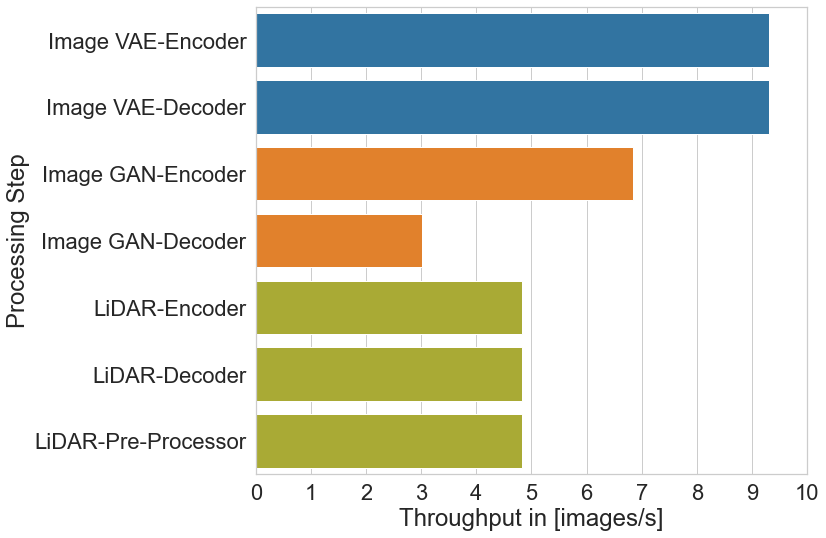

In [32]:
sns.set(font_scale=2)
sns.set_style("whitegrid")

f, ax = plt.subplots()

f.set_size_inches(w=12, h=8) # latex textwidth=5.50107in and we have 2 columns
sns.barplot(x="Throughput in [images/s]",
            y="Processing Step",
            data=results,
            label="Total",
            palette=colors)
ax.set_xticks(range(11))

f.tight_layout()

plt.show()

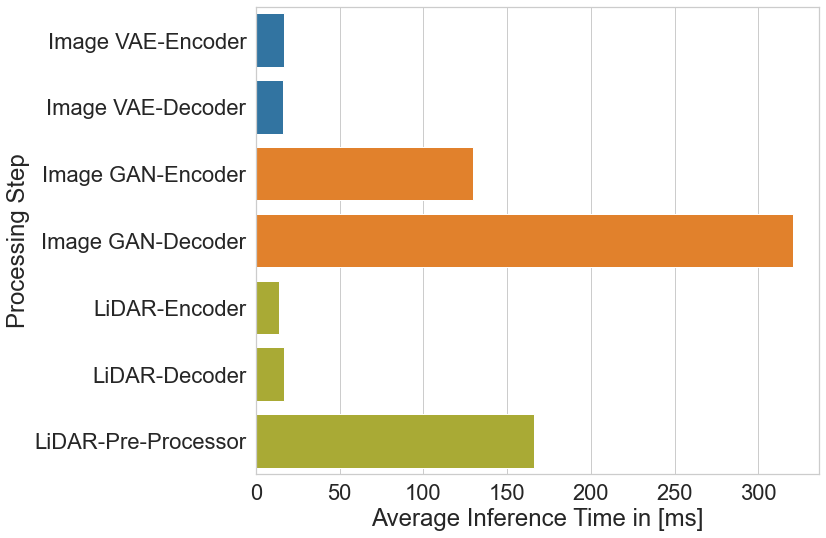

In [33]:
sns.set(font_scale=2)
sns.set_style("whitegrid")

f, ax = plt.subplots()

f.set_size_inches(w=12, h=8) # latex textwidth=5.50107in and we have 2 columns
sns.barplot(x="Average Inference Time in [ms]",
            y="Processing Step",
            data=results,
            label="Total",
            palette=colors)
#ax.set_xticks(range(11))

f.tight_layout()

plt.show()

# VAE Image latent space size = 43kbyte
# VAE LiDAR latent space size = 76kbyte